Deskripsi dataset

In [19]:
import numpy as np
import pandas as pd

# plot
import matplotlib.pyplot as plt
import urllib.request

# tf
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## URL Dataset

In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

url relative path ke dataset

In [21]:
# url = '/content/drive/MyDrive/Dataset'

# Data Train & Validation

untuk split folder train test val

In [22]:
!pip install split-folders


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


tempat untuk naroh output splitfolder

In [23]:
url_split = 'dataset-output'
url = 'insect'

In [24]:
import splitfolders 

splitfolders.ratio(url, output=url_split, seed=42, ratio=(0.7,0.2,0.1), group_prefix=None)

Disini saya menggunakan Image data generator dan batch size sebanyak 128
untuk validation, saya menggunakan 20% data.
Kemudian untuk subset training dan validation, target size nya adalah 120.

ambil path dari folder masing - masing output

In [25]:
train = 'dataset-output/train/'
val = 'dataset-output/val/'
test = 'dataset-output/test/'

In [26]:
batch_size = 128

train_image_generator = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=45,
    horizontal_flip=True,
) #data preprocessing

train = train_image_generator.flow_from_directory(
    train, 
    target_size=(120,120),
    batch_size=batch_size, 
    color_mode="grayscale"
)

test = train_image_generator.flow_from_directory(
    test, 
    target_size=(120,120),
    batch_size=batch_size,
    color_mode="grayscale"
)

val = train_image_generator.flow_from_directory(
    val, 
    target_size=(120,120),
    batch_size=batch_size,
    color_mode="grayscale"
)

Found 3112 images belonging to 5 classes.
Found 449 images belonging to 5 classes.
Found 888 images belonging to 5 classes.


# Model 

Pada syntax di atas model dibentuk dengan suatu layer convo 2 dimensi dari size 120 x 120 pixels dimana fungsi aktivasinya adalah. Terdapat dua pembuatan layer convo, sehingga dilanjutkan dengan pembuatan layer max pooling dan pembuatan layer dropout. Karena ini adalah pelatihan deep learning maka perlu pelatihan lagi dengan membuat lagi layer untuk pelatihan. Kemudian dilanjutkan dengan layer flatten dan layer dense sampai dengan proses kompilasi.



In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        64, 
        (3,3), 
        activation='relu',
        input_shape=(120, 120, 3), 
        padding='same'
        ),

      tf.keras.layers.Conv2D(
        64, (3,3), 
        activation='relu',
        input_shape=(120, 120, 3),
        padding='same'
        ),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(
        256, 
        (3,3), 
        activation='relu', 
        padding='same'
        ),
    
    tf.keras.layers.Conv2D(
      256, 
      (3,3), 
      activation='relu',
      padding='same'
      ),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')     
])

# konfigurasi model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 256)       147712    
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 256)       590080    
                                                        

In [14]:
steps, val_steps = train.n/batch_size, val.n/batch_size
num_epochs = 50

epoch dibuat sebanyak 50

In [15]:
history = model.fit(train, validation_data=val, epochs=num_epochs,
                    steps_per_epoch=steps, validation_steps=val_steps)

Epoch 1/50
24/24 [==============================] - 401s 16s/step - loss: 1.8717 - accuracy: 0.2230 - val_loss: 1.5842 - val_accuracy: 0.2320
Epoch 2/50
24/24 [==============================] - 397s 16s/step - loss: 1.5716 - accuracy: 0.2365 - val_loss: 1.5640 - val_accuracy: 0.2331
Epoch 3/50
24/24 [==============================] - 380s 16s/step - loss: 1.5031 - accuracy: 0.3352 - val_loss: 1.4466 - val_accuracy: 0.3626
Epoch 4/50
24/24 [==============================] - 379s 16s/step - loss: 1.4028 - accuracy: 0.3927 - val_loss: 1.3722 - val_accuracy: 0.4279
Epoch 5/50
24/24 [==============================] - 381s 16s/step - loss: 1.3470 - accuracy: 0.4271 - val_loss: 1.2761 - val_accuracy: 0.4538
Epoch 6/50
24/24 [==============================] - 382s 16s/step - loss: 1.3013 - accuracy: 0.4425 - val_loss: 1.2468 - val_accuracy: 0.4437
Epoch 7/50
24/24 [==============================] - 355s 15s/step - loss: 1.2866 - accuracy: 0.4688 - val_loss: 1.2058 - val_accuracy: 0.4741
Epoch 

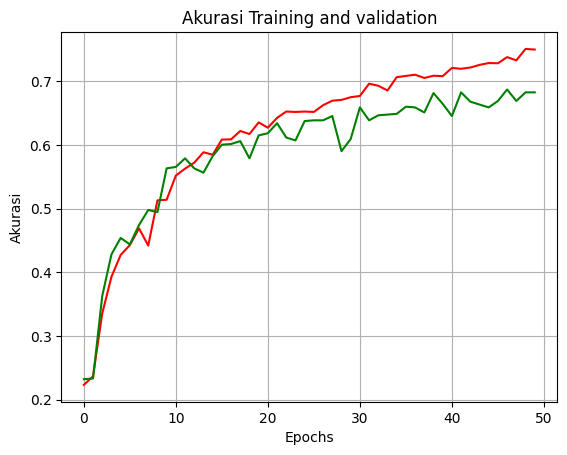

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'g', label='Akurasi Validation')

plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.title('Akurasi Training and validation')
plt.grid(axis='both')

plt.show() 

In [ ]:
# aa